In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt
from itertools import product

In [2]:
# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('ITC.csv')

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date']).dt.date
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [3]:
data.head()

,ds,Open,High,Low,y,Volume
0,2015-01-01,245.07,245.93,244.00,244.77,1692652
1,2015-01-02,244.83,246.77,244.83,245.53,4399784
2,2015-01-05,245.80,247.87,245.03,246.50,5492658
3,2015-01-06,245.77,246.27,239.33,240.17,8728693
4,2015-01-07,238.00,242.67,235.33,235.70,7973720


In [4]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.85)
train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1,interval_width=0.95)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"RMSE on Test Data: {rmse}")

RMSE on Test Data: 34.66074103942815


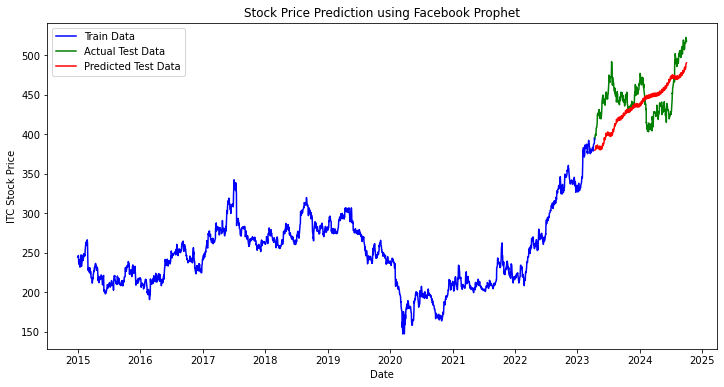

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue')
plt.plot(test_data['ds'], actual_test, label='Actual Test Data', color='green')
plt.plot(test_data['ds'], predicted_test, label='Predicted Test Data', color='red')
plt.xlabel('Date')
plt.ylabel('ITC Stock Price')
plt.title('Stock Price Prediction using Facebook Prophet')
plt.legend()
plt.show()

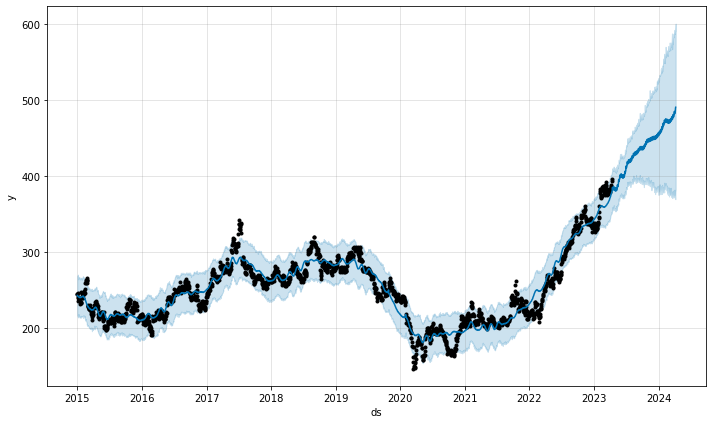

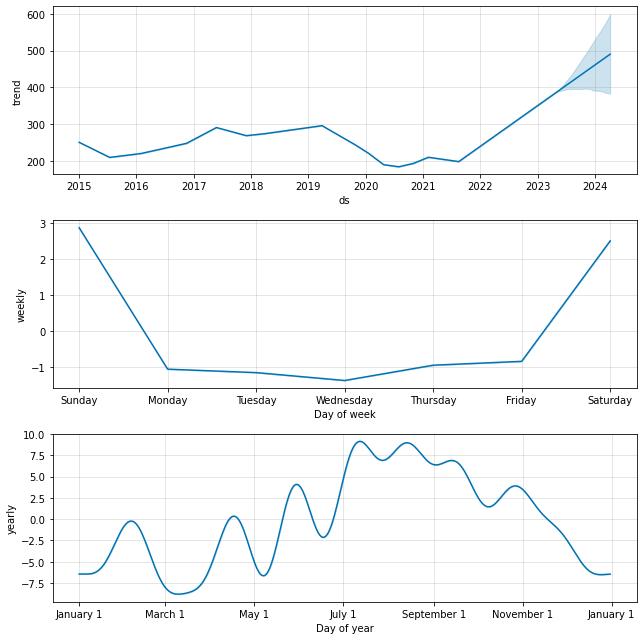

In [8]:
# Prophet's internal plot for visualization
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()

In [9]:
# Define a function for hyperparameter optimization
def optimize_prophet(train_data, param_grid):
    best_params = None
    best_rmse = float('inf')

    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        model = Prophet(**param_dict)
        model.fit(train_data)

        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)

        predicted_test = forecast[-len(test_data):]['yhat'].values
        actual_test = test_data['y'].values

        rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param_dict

    return best_params, best_rmse

# Define the parameter grid for optimization
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

# Optimize the hyperparameters
best_params, best_rmse = optimize_prophet(train_data, param_grid)
print(f"Best Parameters: {best_params}")
print(f"Best RMSE on Validation Data: {best_rmse}")

# Train the model with the best parameters
model = Prophet(**best_params)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"Final RMSE on Test Data: {rmse}")

10:43:25 - cmdstanpy - INFO - Chain [1] start processing
10:43:26 - cmdstanpy - INFO - Chain [1] done processing
10:43:27 - cmdstanpy - INFO - Chain [1] start processing
10:43:27 - cmdstanpy - INFO - Chain [1] done processing
10:43:29 - cmdstanpy - INFO - Chain [1] start processing
10:43:29 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:32 - cmdstanpy - INFO - Chain [1] done processing
10:43:33 - cmdstanpy - INFO - Chain [1] start processing
10:43:35 - cmdstanpy - INFO - Chain [1] done processing
10:43:36 - cmdstanpy - INFO - Chain [1] start processing
10:43:37 - cmdstanpy - INFO - Chain [1] done processing
10:43:39 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] done processing
10:43:41 - cmdstanpy - INFO - Chain [1] start processing
10:43:43 - cmdstanpy - INFO - Chain [1] done processing
10:43:44 - cmdstanpy - INFO - Chain [1] start processing
10:43:46 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}
Best RMSE on Validation Data: 34.19936237638266


10:44:22 - cmdstanpy - INFO - Chain [1] start processing
10:44:23 - cmdstanpy - INFO - Chain [1] done processing


Final RMSE on Test Data: 34.19936237638266
